## **Thresholding**

Thresholding is one of the most common (and basic) **segmentation technique** in computer vision and it **allows us to separate the foreground** (i.e. the objects that we are interested in) **from the background of the image**.

* Thresholding is the binarization of an image. 
* In general, convert a grayscale image to a binary image, where the pixels are either 0 or 255.


Thresholding comes in many forms:


1.   **Simple thresholding**: where we **manually supply parameter to segment the image** — this works extremely well in **controlled lighting conditions**, where we can ensure **high contrast between the foreground and background of the image**.
* Selecting a **threshold value T**, and then **setting all pixel intensities less than T to zero**, and **all pixel values greater than T to 255**. 
* We could also apply the **inverse of this binarization** by **setting all pixels greater than T to 0** and **all pixel intensities below T to 255**.

2.   **Otsu’s thresholding** that attempt to be more dynamic and **automatically compute the optimal threshold** value based on the input image.
* Method assumes that our **image contains two classes of pixels**: the **background** and the **foreground**.
* It also makes an assumption that the **grayscale histogram of our pixel intensities of our image is bi-modal**, which simply means that the histogram is two peaks.
* **Based on the grayscale histogram**, Otsu’s method then **computes an optimal threshold value T** such that the **variance between the background and foreground peaks is minimal**.
* This method works under the **semi-stable lighting conditions**. 

3.  **Adaptive thresholding** or **Local thresholding** : Instead of applying a threshold to an image globally using a single value, **break the image down into smaller pieces, and threshold each of these pieces separately and individually**.
* It considers a **small neighbors of pixels and then finds an optimal threshold value T for each neighbor**. 
* This method assumes a **smaller regions of an image** are more likely to have **approximately uniform illumination**. 
* However, **choosing the size of the pixel neighborhood** for local thresholding is **absolutely crucial**.
* The **neighborhood** must be **large enough to cover sufficient background and foreground pixels**, otherwise the value of T will be more or less irrelevant.
* **Which statistic do we use to compute the threshold value T for each region?**
* As a common practice - use either the **arithmetic mean** or the **Gaussian mean** of the pixel intensities in each region. 
* In the **arithmetic mean**, **each pixel in the neighborhood contributes equally to computing T**. 
* And in the **Gaussian mean**, **pixel values farther away from the (x, y)-coordinate center of the region contribute less to the overall calculation of T**.
* The general **formula to compute T** is thus:
		T=mean(IL)-C
where the **mean** is either the **arithmetic** or **Gaussian mean**, **IL** is the **local sub-region of the image I** , and **C** is some **constant** which we can **use to fine tune the threshold value T**.



In [1]:
# import the necessary packages
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import argparse
import cv2
import numpy as np

In [2]:
from google.colab import files
coins = files.upload()

Saving coins01.png to coins01.png


Original Image


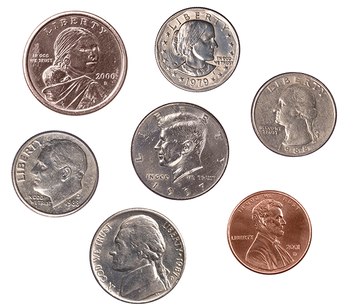



Grayscale Image


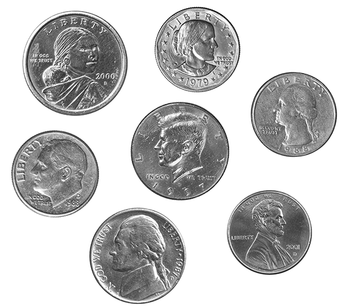



Gaussian Blurred Image


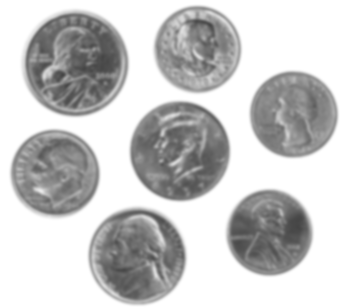

In [3]:
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread("coins01.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
print("Original Image")
cv2_imshow(image)
print("\n")
print("Grayscale Image")
cv2_imshow(gray)
print("\n")
print("Gaussian Blurred Image")
cv2_imshow(blurred)

Blurred Image


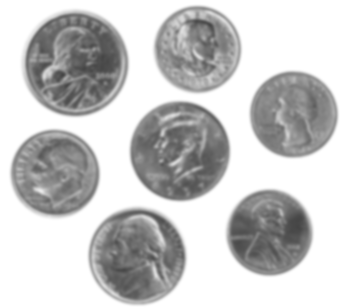



Threshold Binary Image


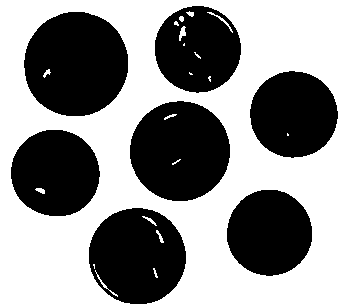



simple thresholding value: 200.0


In [4]:
# apply basic thresholding -- the first parameter is the image we want to threshold, the second value is is our threshold
# check; if a pixel value is greater than our threshold (in this case, 200), we it to be WHITE, otherwise it is BLACK.
(T, thresh) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)
print("Blurred Image")
cv2_imshow(blurred)
print("\n")
print("Threshold Binary Image")
cv2_imshow(thresh)
print("\n")
print ("simple thresholding value: {}".format(T))

Blurred Image


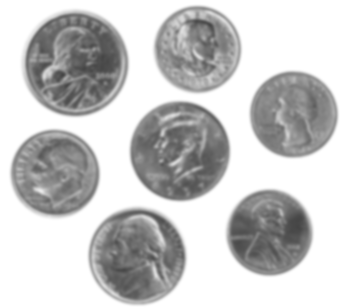



Threshold Binary Inverse Image


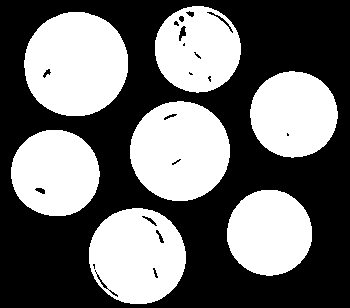



simple thresholding value: 200.0


In [5]:
# using normal thresholding (inverse thresholding), we can change the last argument in the function to make the coins
# black rather than white.
(T, threshInv) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)
print("Blurred Image")
cv2_imshow(blurred)
print("\n")
print("Threshold Binary Inverse Image")
cv2_imshow(threshInv)
print("\n")
print ("simple thresholding value: {}".format(T))

Mask filtered output


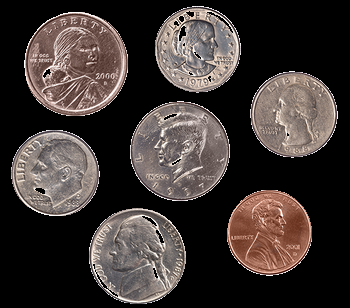

In [6]:
# finally, we can visualize only the masked regions in the image
print("Mask filtered output")
cv2_imshow(cv2.bitwise_and(image, image, mask=threshInv))

Otsu Threshold


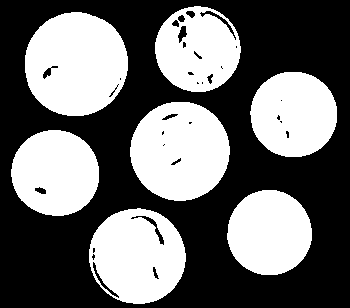

Otsu's thresholding value: 191.0


Otsu Threshold Mask Output


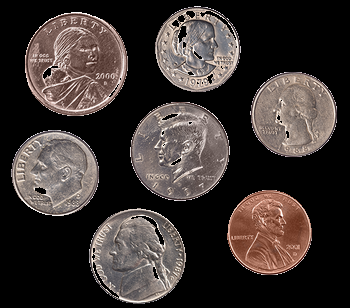

In [7]:
# apply Otsu's automatic thresholding -- Otsu's method automatically determines the best threshold value `T` for us
# T=0, Remember that Otsu’s method is going to automatically compute the optimal value of T 
# for us. We could technically specify any value we wanted for this argument; however, I like to 
# supply a value of 0 as a type of “don’t care” parameter.
# The third argument is the output value of the threshold, provided the given pixel passes the threshold test.
# The last argument is one we need to pay extra special attention to. Previously, we had 
# supplied values of cv2.THRESH_BINARY or cv2.THRESH_BINARY_INV depending on what 
# type of thresholding we wanted to perform. But now we are passing in a second flag that is 
# logically OR’d with the previous method. Notice that this method is cv2.THRESH_OTSU, 
# which obviously corresponds to Otsu’s thresholding method.
(T, threshInv) = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print("Otsu Threshold")
cv2_imshow(threshInv)
print ("Otsu's thresholding value: {}".format(T))
print("\n")
# finally, we can visualize only the masked regions in the image
print("Otsu Threshold Mask Output")
cv2_imshow(cv2.bitwise_and(image, image, mask=threshInv))

In [8]:
image_nonuniform = files.upload()

Saving non-uniform_lighting.png to non-uniform_lighting.png


Original Image


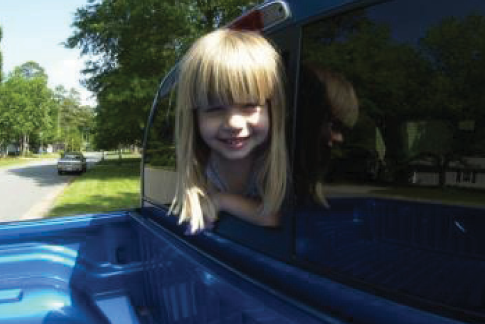



Grayscale Image


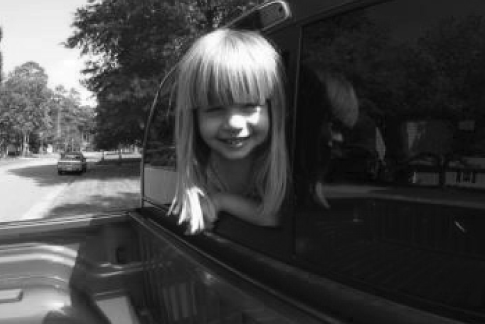



Gaussian Blurred Image


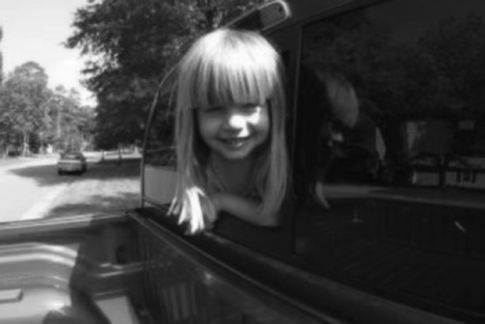

In [9]:
# load the image, convert it to grayscale, and blur it slightly
image_new = cv2.imread("non-uniform_lighting.png")
gray_new = cv2.cvtColor(image_new, cv2.COLOR_BGR2GRAY)
blurred_new = cv2.GaussianBlur(gray_new, (3, 3), 0)
print("Original Image")
cv2_imshow(image_new)
print("\n")
print("Grayscale Image")
cv2_imshow(gray_new)
print("\n")
print("Gaussian Blurred Image")
cv2_imshow(blurred_new)

Adaptive Threshold


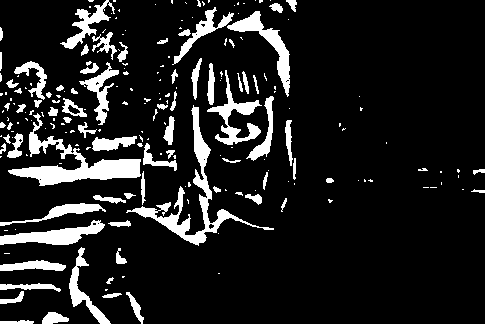



Adaptive Threshold Mask Output


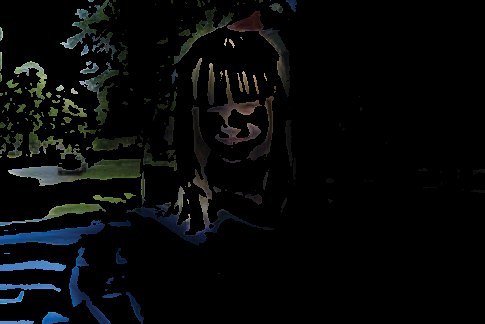

In [ ]:
# instead of manually specifying the threshold value, we can use adaptive thresholding to 
# examine neighborhoods of pixels and adaptively threshold each neighborhood -- in this 
# example, we'll calculate the mean value of the neighborhood area of 25 pixels and threshold 
# based on that value; finally, our constant C is subtracted from the mean calculation (in this case 15)
# second parameter is the output threshold, third argument is the adaptive thresholding method. Here we supply a value of 
# cv2.ADAPTIVE_THRESH_MEAN_C to indicate that we are using the arithmetic mean of the 
# local pixel neighborhood to compute our threshold value of T. We could also supply a value of 
# cv2.ADAPTIVE_THRESH_GAUSSIAN_C to indicate we want to use the Gaussian average
# The fourth value to cv2.adaptiveThreshold is the threshold method, again just like in the
# Simple Thresholding and Otsu’s Method sections. Here we pass in a value of 
# cv2.THRESH_BINARY_INV to indicate that any pixel value that passes the threshold test will 
# have an output value of 0. Otherwise, it will have a value of 255.
# The fifth parameter is our pixel neighborhood size. Here you can see that we’ll be computing 
# the mean grayscale pixel intensity value of each 25x25 sub-region in the image to compute our threshold value T.
# The final argument to cv2.adaptiveThreshold is the constant C which lets us fine tune our threshold value. 
threshInv_new = cv2.adaptiveThreshold(blurred_new, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 15)
print("Adaptive Threshold")
cv2_imshow(threshInv_new)
print("\n")

# finally, we can visualize only the masked regions in the image
print("Adaptive Threshold Mask Output")
cv2_imshow(cv2.bitwise_and(image_new, image_new, mask=threshInv_new))